In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

In [3]:
#General data info
data.head()

,CPU,throughput
0,0.196560,17.945073
1,0.121706,11.485114
2,0.081606,7.844668
3,0.963982,67.497399
4,0.174581,16.091151


In [4]:
data.describe()

,CPU,throughput
count,3000.000000,3000.000000
mean,0.500082,38.591760
std,0.291863,19.998605
min,0.000212,0.021177
25%,0.243782,21.815671
50%,0.494015,40.146714
75%,0.758839,56.465367
max,0.999886,69.309028


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


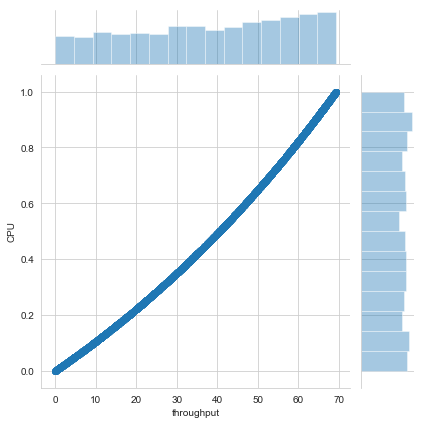

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


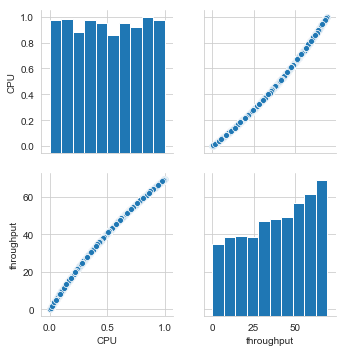

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9961351641631878

In [9]:
datalm = data


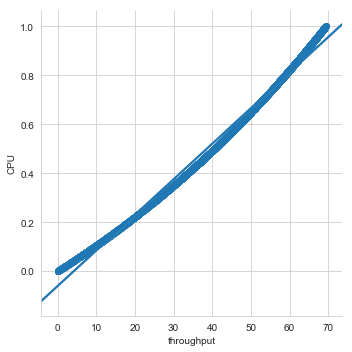

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Hyper parameter tuning using GridSearch CV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a SDG regression model, testing each alpha
model = SGDRegressor(max_iter=1000, tol=1e-3)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9417835774651158
0.0


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [12]:
#SDG Model
sdg = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.001)
sdg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [13]:
#Test data prediction
prediction = sdg.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.227782,0.283799
1,0.819631,0.759463
2,0.148300,0.202883
3,0.732500,0.700138
4,0.364886,0.411790
5,0.860491,0.786312
6,0.010975,0.048891
7,0.608692,0.610495
8,0.838031,0.771627
9,0.398241,0.440980


Text(0, 0.5, 'Predicted Y')

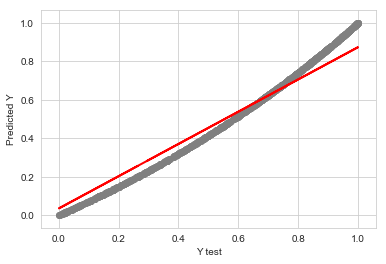

In [14]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [15]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))




MAE: 0.04781791011126254
MSE: 0.0030795801490569284
RMSE: 0.05549396497869771


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


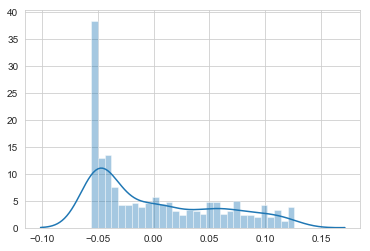

In [16]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [17]:
# save the model to disk
filename = '../models/SDG_model.sav'
pickle.dump(sdg, open(filename, 'wb'))

In [18]:
sdg.predict([[0]])

array([0.03595002])